# Data collecting :
##Objective : collecting data from sources
  noisy_covid_data.csv: Contains COVID-19 case data with potential noise and missing values.

  population_data.csv: Contains population data for merging with COVID-19 data.

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
covid_data = pd.read_csv('/content/drive/MyDrive/corona/noisy_covid_data.csv')
population_data = pd.read_csv('/content/drive/MyDrive/corona/population_data.csv')

# Data Cleaning
  ## Objective: Prepare the data by handling missing values and outliers.

In [9]:
# Inspect data
print(covid_data.info(),"\n\n")
print(covid_data.describe(),"\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    1000 non-null   object 
 1   State      1000 non-null   object 
 2   Confirmed  1000 non-null   float64
 3   Deaths     1000 non-null   float64
 4   Recovered  1000 non-null   float64
 5   Date       1000 non-null   object 
dtypes: float64(3), object(3)
memory usage: 47.0+ KB
None 


           Confirmed       Deaths     Recovered
count    1000.000000  1000.000000   1000.000000
mean    49356.414000  2241.471000  31860.520000
std     49177.763761  1548.491323  22243.988088
min         0.000000     0.000000      0.000000
25%     16366.000000   856.750000  11174.000000
50%     46078.500000  2190.000000  31367.000000
75%     74514.750000  3643.000000  51386.500000
max    500000.000000  4998.000000  69885.000000 




In [10]:
# Handle missing values
covid_data.fillna({'Confirmed': 0, 'Deaths': 0, 'Recovered': 0}, inplace=True)


In [11]:
# Handle outliers in 'Confirmed' (e.g., cap at 500,000)
covid_data['Confirmed'] = covid_data['Confirmed'].clip(upper=500000)

#Data Wrangling
##Objective: Structure the datasets for analysis.

In [12]:
# Parsing dates
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Grouping data by country
country_data = covid_data.groupby('Country').agg(
    Total_Confirmed=('Confirmed', 'sum'),
    Total_Deaths=('Deaths', 'sum'),
    Total_Recovered=('Recovered', 'sum')
).reset_index()

# Merging with population data
merged_data = pd.merge(country_data, population_data, on='Country', how='left')

# Calculating cases per-capita
merged_data['Cases_per_Capita'] = merged_data['Total_Confirmed'] / merged_data['Population']


#Data Mining
##Objective: Extract meaningful patterns and insights.

In [13]:
# Rank countries by confirmed cases
top_countries = merged_data.nlargest(10, 'Total_Confirmed')

# Calculate fatality rate
merged_data['Fatality_Rate'] = merged_data['Total_Deaths'] / merged_data['Total_Confirmed']


#Modeling
##Objective: Predict trends and insights.

In [14]:
# Resampling and calculating rolling averages
covid_data.set_index('Date', inplace=True)
weekly_data = covid_data.resample('W').sum()
weekly_data['7-Day_Rolling_Avg'] = weekly_data['Confirmed'].rolling(window=7).mean()


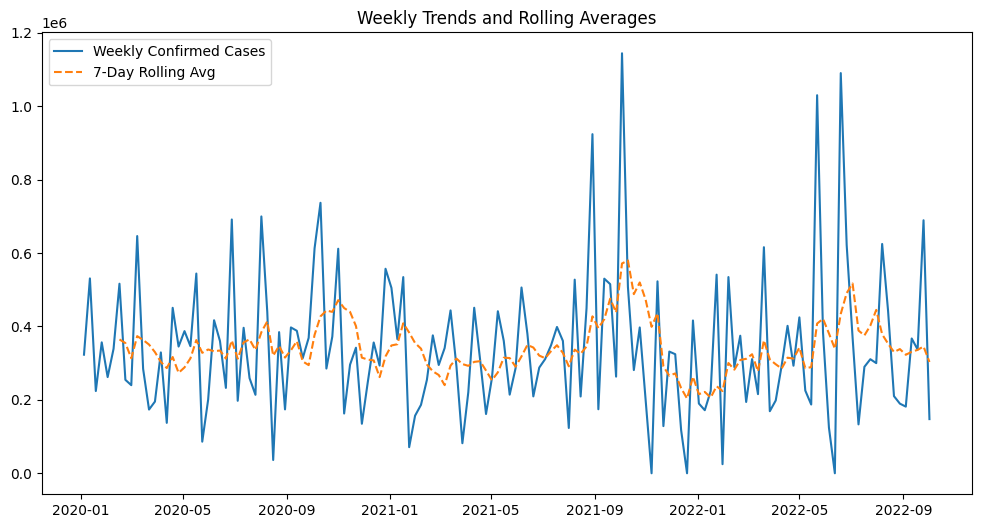

In [15]:
# Plot trends
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['Confirmed'], label='Weekly Confirmed Cases')
plt.plot(weekly_data.index, weekly_data['7-Day_Rolling_Avg'], label='7-Day Rolling Avg', linestyle='--')
plt.legend()
plt.title('Weekly Trends and Rolling Averages')
plt.show()

In [16]:
# Save final report
final_report = merged_data[['Country', 'Total_Confirmed', 'Total_Deaths', 'Total_Recovered', 'Fatality_Rate', 'Cases_per_Capita']]
final_report.to_csv('Corona_Analysis.csv', index=False)


#***Final Deliverables***
##Cleaned Datasets:
No missing values or extreme outliers.
##Aggregated Data:
Summarized by country and/or date.
##Visualizations:
Line plots for trends, bar charts for rankings, etc.
##Final CSV Report:
Key metrics for each country.